# SD212: Graph mining
## Solution to Lab 4: Hierarchical clustering

In this lab, you will learn to analyse the hierarchical structure of a graph. 

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [3]:
from sknetwork.data import load_netset, karate_club
from sknetwork.hierarchy import LouvainIteration, Paris, cut_straight
from sknetwork.ranking import PageRank
from sknetwork.visualization import svg_graph, svg_dendrogram

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paristech.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [5]:
dataset = karate_club(True)

In [6]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

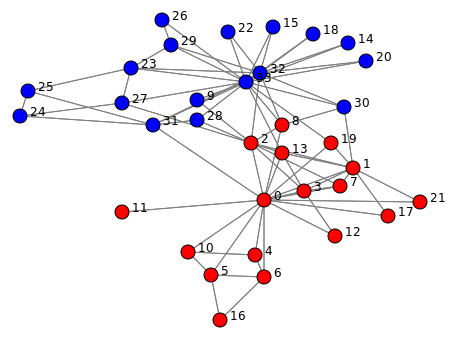

In [7]:
image = svg_graph(adjacency, position, labels=labels_true, names=np.arange(len(labels_true)))
SVG(image)

## To do

* Cluster the graph by the hierarchical Louvain algorithm.
* Display the dendrogram.
* How many clusters are there at depth 1?
* Display the graph with the corresponding clustering.
* How many clusters are there at depth 2?

In [8]:
louvain = LouvainIteration()

In [9]:
dendrogram = louvain.fit_predict(adjacency)

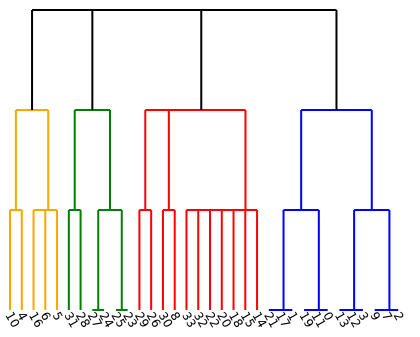

In [10]:
image = svg_dendrogram(dendrogram, names=np.arange(34))
SVG(image)

In [11]:
labels = cut_straight(dendrogram, n_clusters=2)

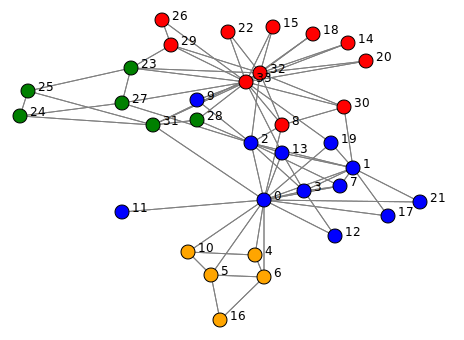

In [12]:
image = svg_graph(adjacency, position, labels=labels, names=np.arange(34))
SVG(image)

In [13]:
labels = cut_straight(dendrogram, n_clusters=5)

In [14]:
len(set(labels))

9

## To do

* Cluster the graph by the Paris algorithm.
* Display the dendrogram.
* Display the graph with the top-2 clusters. Compare this clustering to the ground-truth labels.
* Display the graph with the top-4 clusters. Compare this clustering with that given by Louvain. 
* Display the corresponding aggregate dendrogram. 

In [15]:
paris = Paris()

In [16]:
dendrogram = paris.fit_predict(adjacency)

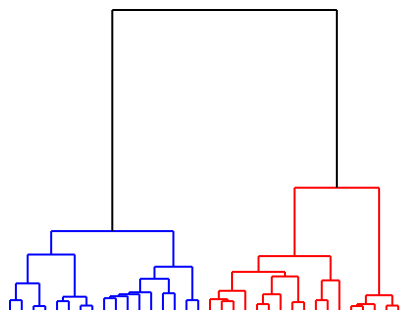

In [17]:
image = svg_dendrogram(dendrogram)
SVG(image)

In [18]:
labels = cut_straight(dendrogram, 2)

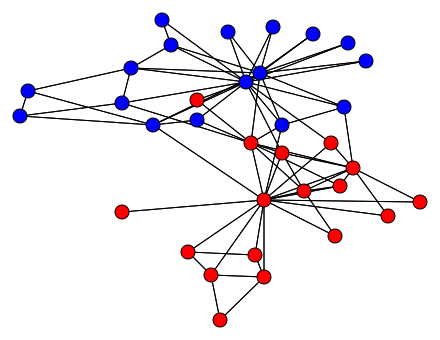

In [19]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [20]:
misclassified = np.flatnonzero(labels != labels_true)

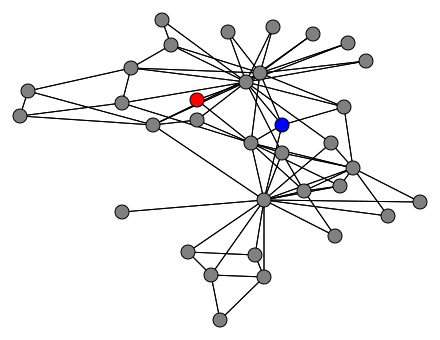

In [21]:
image = svg_graph(adjacency, position, labels={i: labels[i] for i in misclassified})
SVG(image)

In [22]:
labels = cut_straight(dendrogram, 4)

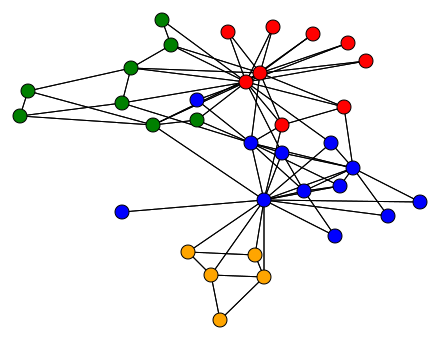

In [23]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [24]:
dendrogram_ = louvain.fit_predict(adjacency)
labels_ = cut_straight(dendrogram_, 4)

In [25]:
diff = np.flatnonzero(labels != labels_)

In [26]:
len(diff)

2

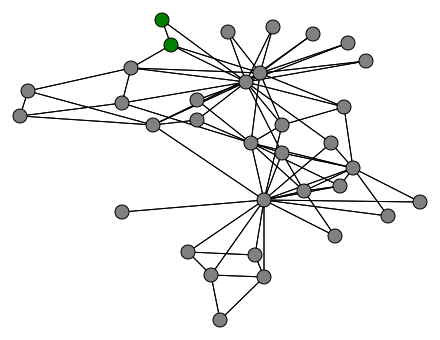

In [27]:
image = svg_graph(adjacency, position, labels={i: labels[i] for i in diff})
SVG(image)

In [28]:
labels, dendrogram_aggregate = cut_straight(dendrogram, 4, return_dendrogram=True)

In [29]:
_, counts = np.unique(labels, return_counts=True)

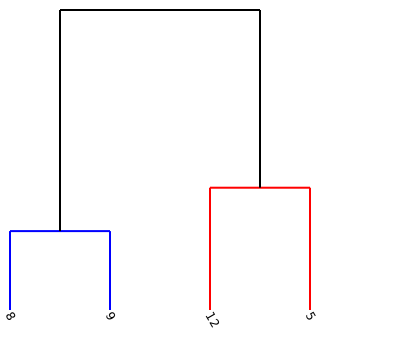

In [30]:
image = svg_dendrogram(dendrogram_aggregate, names=counts)
SVG(image)

## Openflights


In [31]:
dataset = openflights

In [32]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

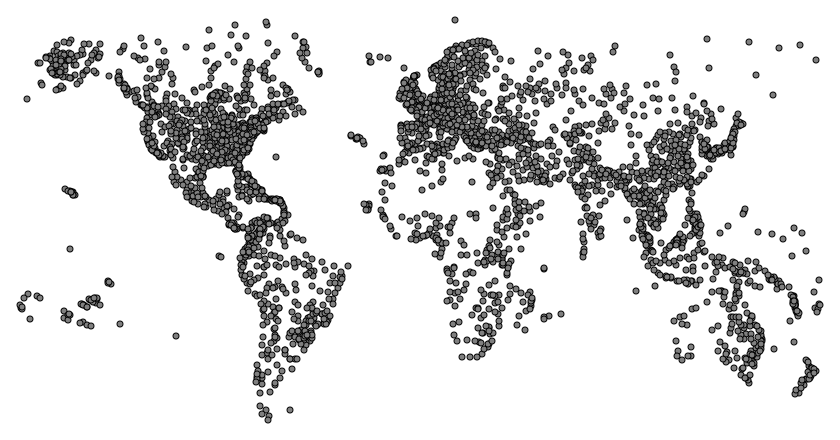

In [33]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the top-10 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-40 clusters found by Paris, with the name of the top airport  (in traffic) of each cluster.

In [34]:
paris = Paris()

In [35]:
dendrogram = paris.fit_predict(adjacency)

In [36]:
labels = cut_straight(dendrogram, 10)

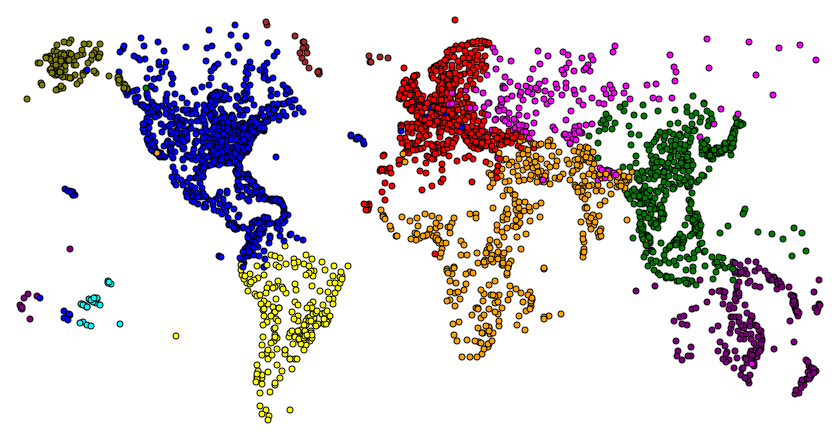

In [37]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, labels=labels, display_edges=False)
SVG(image)

In [38]:
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters=40, return_dendrogram=True)

In [39]:
labels_unique, counts = np.unique(labels, return_counts=True)

In [40]:
weights = adjacency.dot(np.ones(adjacency.shape[0]))

In [41]:
top_airports = []
for l in labels_unique:
    cluster = np.flatnonzero(labels == l)
    top_airports.append(cluster[np.argmax(weights[cluster])])

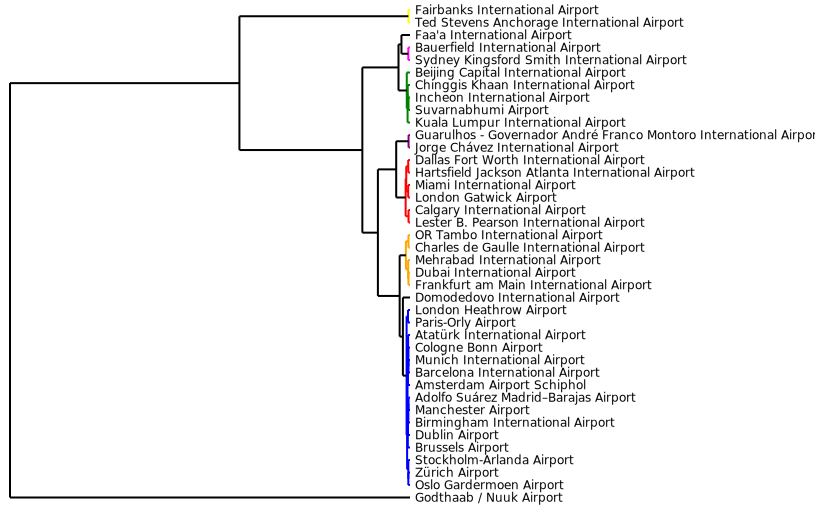

In [42]:
image = svg_dendrogram(dendrogram_aggregate, names=names[top_airports], rotate=True, n_clusters=10, height=500)
SVG(image)

## 2. Directed graphs

## Wikipedia Vitals

In [43]:
dataset = wikivitals

In [44]:
adjacency = dataset.adjacency
names = dataset.names

## To do

* Cluster the graph by the Paris algorithm.
* Give the size and top-5 articles of each of the top-40 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-40 clusters, with the name of the top article of each cluster.

In [45]:
paris = Paris()

In [46]:
dendrogram = paris.fit_predict(adjacency)

In [47]:
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters=40, return_dendrogram=True)

In [48]:
pagerank = PageRank()

In [49]:
for label in np.unique(labels):
    mask = labels == label
    scores = pagerank.fit_predict(adjacency, weights=mask)
    top = np.argsort(-scores[mask])[:5]
    print(names[mask][top], np.sum(mask))

['The New York Times' 'BBC' 'Time (magazine)' 'Encyclopædia Britannica'
 'Jazz'] 726
['Taxonomy (biology)' 'Animal' 'Chordate' 'Permian' 'Jurassic'] 674
['Plant' 'Flowering plant' 'Protein' 'Sugar' 'Gloss (optics)'] 604
['World Health Organization' 'Medical diagnosis' 'Bacteria' 'Cancer'
 'Immune system'] 478
['Water' 'Pressure' 'Plate tectonics' 'Glacier' 'Erosion'] 427
['Albert Einstein' 'Physics' 'International System of Units' 'Electron'
 'Kelvin'] 329
['Christianity' 'Catholic Church' 'Eastern Orthodox Church' 'Judaism'
 'Augustine of Hippo'] 318
['Oxygen' 'Hydrogen' 'Carbon' 'Nitrogen' 'Iron'] 317
['Immanuel Kant' 'David Hume' 'Epistemology' 'Age of Enlightenment'
 'Logic'] 293
['Egypt' 'Islam' 'Iran' 'Persian language' 'Syria'] 289
['Karl Marx' 'United Nations' 'Adam Smith' 'John Stuart Mill' 'Economics'] 287
['Earth' 'Sun' 'NASA' 'Solar System' 'Star'] 286
['Japan' 'Indonesia' 'Thailand' 'Philippines' 'Cambodia'] 283
['Real number' 'Function (mathematics)' 'Complex number' 'Int

In [50]:
top_articles = []
for label in np.unique(labels):
    mask = labels == label
    scores = pagerank.fit_predict(adjacency, weights=mask)
    top = np.argmax(scores[mask])
    top_articles.append(np.flatnonzero(mask)[top])

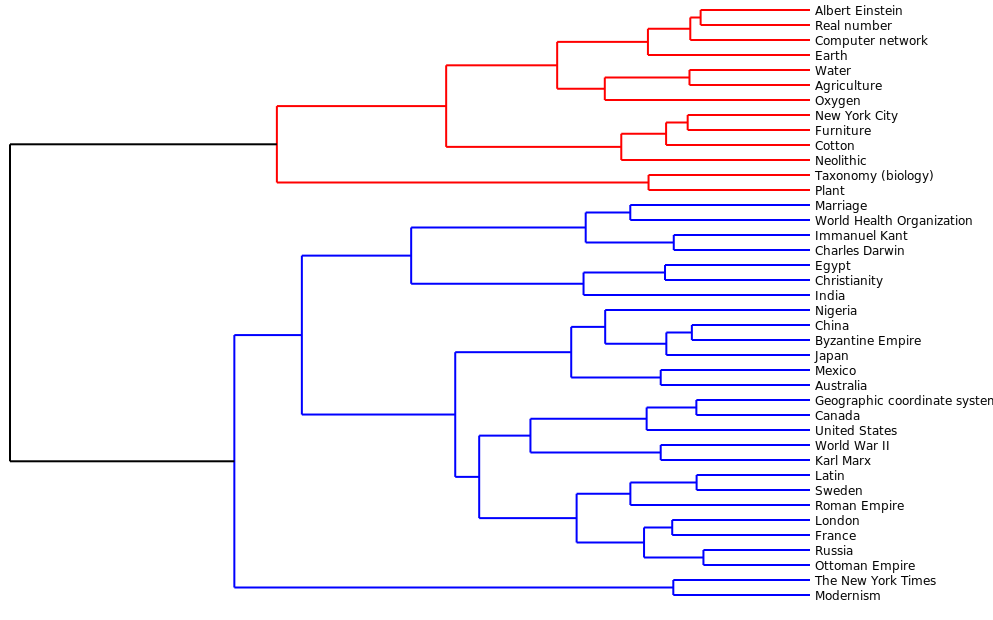

In [51]:
image = svg_dendrogram(dendrogram_aggregate, names=names[top_articles], rotate=True, scale=2)
SVG(image)

## To do

* Complete the following function that returns the nested clusters from a target node in a dendrogram.
* Give the size and top-5 articles of each nested cluster from the article **Riverboat**.

In [52]:
def get_cluster_nested(dendrogram: np.ndarray, node: int): 
    '''Get the nested clusters of a node, following the path from the corresponding leaf to the root in the dendrogram.
    
    Parameters
    ----------
    dendrogram: 
        Dendrogram
    node:
        Target node
        
    Returns
    -------
    cluster_nested: list of list
        Nested clusters, as a partition of the set of nodes. 
        
    Example
    -------
    >>> dendrogram = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])
    >>> get_cluster_nested(dendrogram, 0)
    [[0], [1], [2, 3]]
    '''
    n = dendrogram.shape[0] + 1
    
    cluster = {i: [i] for i in range(n)}
    cluster_nested = [[node]]
    cluster_index = node
    
    for t in range(n - 1):
        i = int(dendrogram[t][0])
        j = int(dendrogram[t][1])
        if i == cluster_index:
            cluster_nested.append(cluster[j])
            cluster_index = n + t
        elif j == cluster_index:
            cluster_nested.append(cluster[i])
            cluster_index = n + t
        cluster[n + t] = cluster.pop(i) + cluster.pop(j)
    
    return cluster_nested

In [53]:
{i: name for i, name in enumerate(names) if name=='Riverboat'}

{7696: 'Riverboat'}

In [54]:
node = 7696

In [55]:
names[node]

'Riverboat'

In [56]:
cluster_nested = get_cluster_nested(dendrogram, node)

In [57]:
len(cluster_nested)

21

In [58]:
cluster = []
for cluster_add in cluster_nested:
    cluster += cluster_add
    weights = {node: 1 for node in cluster}
    scores = pagerank.fit_predict(adjacency, weights)
    top_nodes = np.array(cluster)[np.argsort(-scores[cluster])[:5]]
    print(names[top_nodes], len(cluster))

['Riverboat'] 1
['Tanker (ship)' 'Riverboat'] 2
['Tanker (ship)' 'Riverboat' 'Passenger ship' 'Merchant ship'] 4
['Tanker (ship)' 'Riverboat' 'Passenger ship' 'Merchant ship'
 'Freight transport'] 5
['Tanker (ship)' 'Riverboat' 'Passenger ship' 'Cargo ship' 'Merchant ship'] 6
['Fishing vessel' 'Tanker (ship)' 'Riverboat' 'Passenger ship'
 'Cargo ship'] 7
['Fishing vessel' 'Barge' 'Tanker (ship)' 'Riverboat' 'Passenger ship'] 8
['Ferry' 'Fishing vessel' 'Barge' 'Tanker (ship)' 'Riverboat'] 9
['Ferry' 'Fishing vessel' 'Barge' 'Tanker (ship)' 'Riverboat'] 10
['Ferry' 'Fishing vessel' 'Barge' 'Tanker (ship)' 'Riverboat'] 11
['Ferry' 'Fishing vessel' 'Barge' 'Tanker (ship)' 'Riverboat'] 12
['Ferry' 'Fishing vessel' 'Barge' 'Tanker (ship)' 'Cargo'] 17
['Ferry' 'Rail transport' 'Airport' 'Rapid transit' 'Airline'] 44
['Internal combustion engine' 'Diesel engine' 'Aircraft' 'Jet engine'
 'Electric motor'] 129
['New York City' 'Internal combustion engine' 'Diesel engine' 'Aircraft'
 'Rail trans